# Correlations

Calculate Pearson correlations between different cryptocurrencies.

In [1]:
import glob
import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Read 1 minute time bars

In [2]:
TIME_BAR_DIR = '/data/bars/TimeBar/60000'

In [3]:
from utils import read_bars

def read_prices(csv_file: str)->pd.Series:
    TIME_BEGIN = pd.to_datetime('2020-06-01T00:00:00.000Z')
    TIME_END = pd.to_datetime('2020-06-30T00:00:00.000Z')
    bars_df = read_bars(csv_file)
    bars_df = bars_df[(bars_df['timestamp'] >= TIME_BEGIN) & (bars_df['timestamp_end'] < TIME_END)]

    prices = bars_df['volume_quote'] / bars_df['volume']
    filename = os.path.basename(csv_file)[len('TimeBar.60000.'):-len('.csv')]
    return prices.rename(filename)

In [4]:
def read_prices_all()->pd.DataFrame:
    csv_files = glob.glob(f'{TIME_BAR_DIR}/TimeBar.60000.Binance.*.csv') + \
                glob.glob(f'{TIME_BAR_DIR}/TimeBar.60000.BitMEX.*.csv') + \
                glob.glob(f'{TIME_BAR_DIR}/TimeBar.60000.OKEx.*.csv') + \
                glob.glob(f'{TIME_BAR_DIR}/TimeBar.60000.Huobi.*.csv')
    csv_files = sorted(csv_files)
    prices_list = [read_prices(csv_file) for csv_file in csv_files]
    return pd.concat(prices_list, axis=1)

In [5]:
prices_df = read_prices_all()

In [6]:
prices_df

,Binance.Spot.ADA_USDT,Binance.Spot.ALGO_USDT,Binance.Spot.ATOM_USDT,Binance.Spot.BAT_USDT,Binance.Spot.BCH_USDT,Binance.Spot.BNB_USDT,Binance.Spot.BTC_USDT,Binance.Spot.DASH_USDT,Binance.Spot.EOS_USDT,Binance.Spot.ETC_USDT,...,OKEx.Swap.XLM_USD,OKEx.Swap.XLM_USDT,OKEx.Swap.XMR_USD,OKEx.Swap.XMR_USDT,OKEx.Swap.XRP_USD,OKEx.Swap.XRP_USDT,OKEx.Swap.XTZ_USD,OKEx.Swap.XTZ_USDT,OKEx.Swap.ZEC_USD,OKEx.Swap.ZEC_USDT
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-06-06 15:34:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-06 16:04:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.290002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-06 16:50:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.03
2020-06-06 17:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.909,2.915,NaN,NaN
2020-06-06 17:04:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29 23:54:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.065070,NaN,NaN,0.177300,0.177288,2.413,NaN,NaN,NaN
2020-06-29 23:55:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.065166,NaN,NaN,0.177347,0.177346,2.413,NaN,NaN,NaN
2020-06-29 23:56:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plot correlations between different trading pairs in the same exchange

In [7]:
def plot_corrs_in_exchange(exchange: str, market_type: str, width: int=16)->None:
    prefix = f'{exchange}.{market_type}.'
    df = prices_df.filter(regex=prefix)
    df.columns = [col[len(prefix):] for col in df.columns.values]

    fig, ax = plt.subplots(figsize=(width, width))
    sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center=0, ax=ax).set_title(f'{exchange} {market_type}')

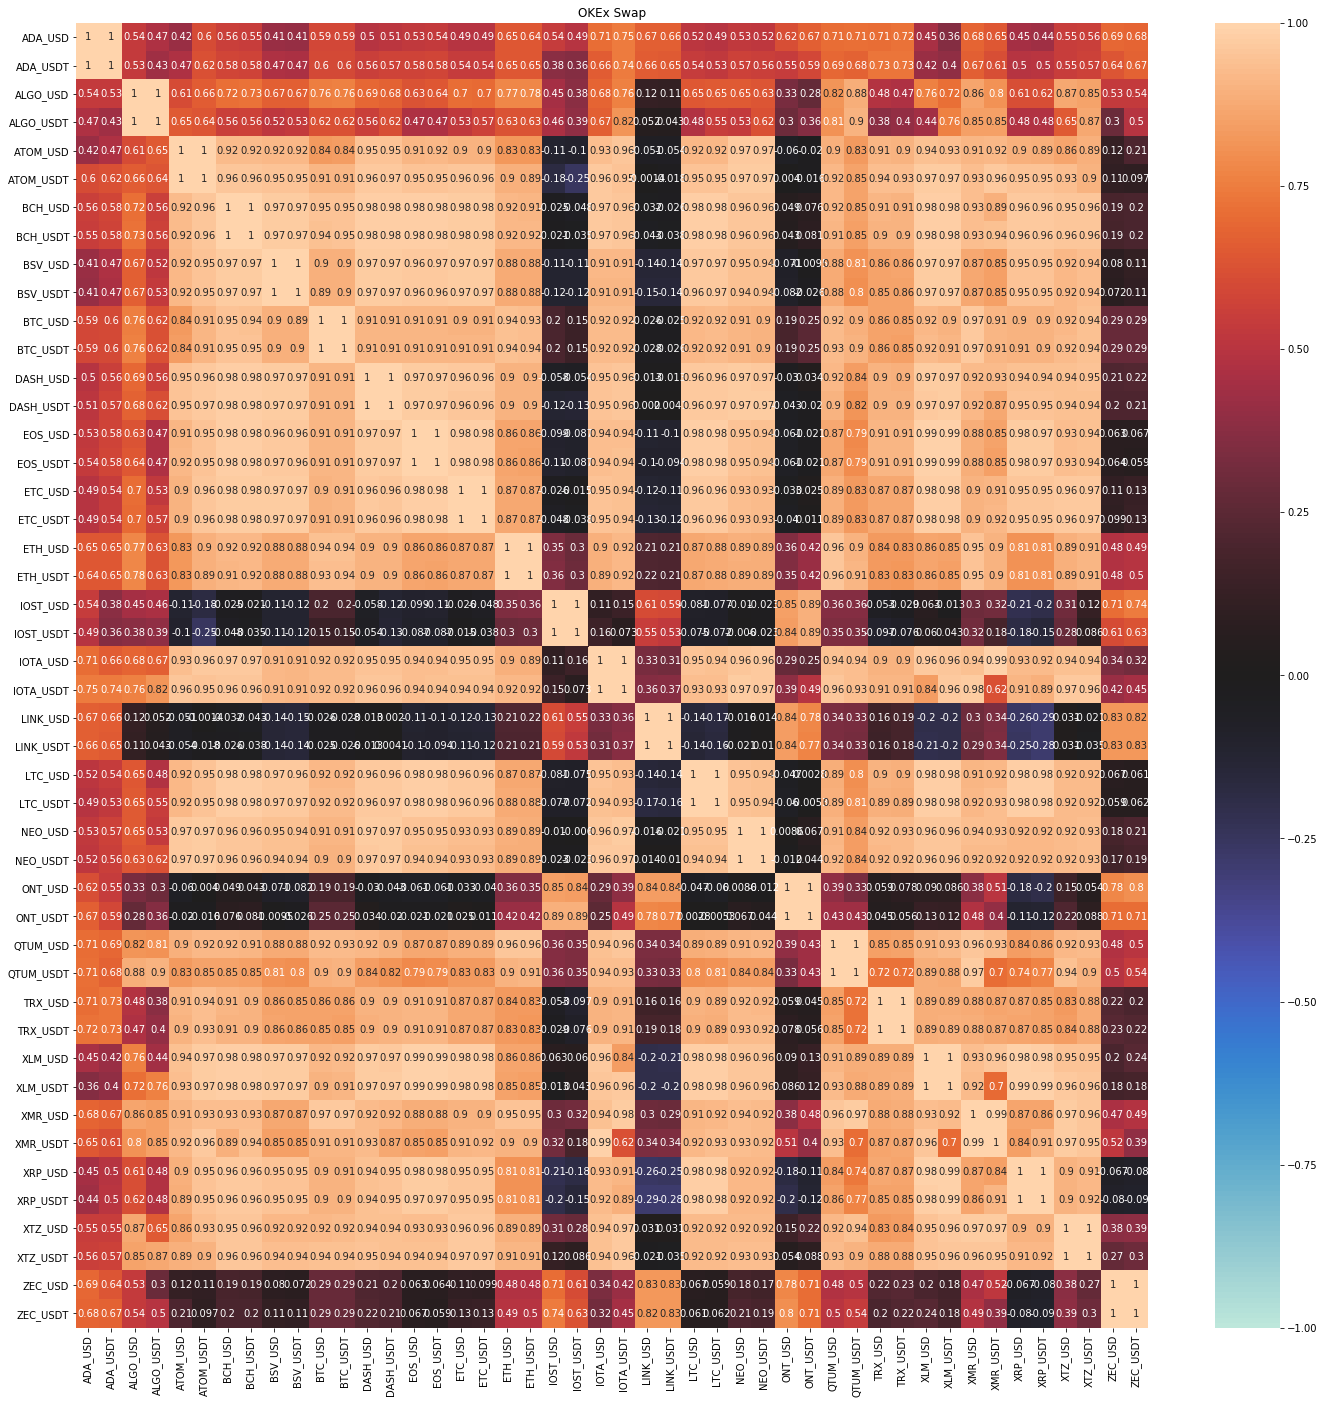

In [8]:
plot_corrs_in_exchange('OKEx', 'Swap', 24)

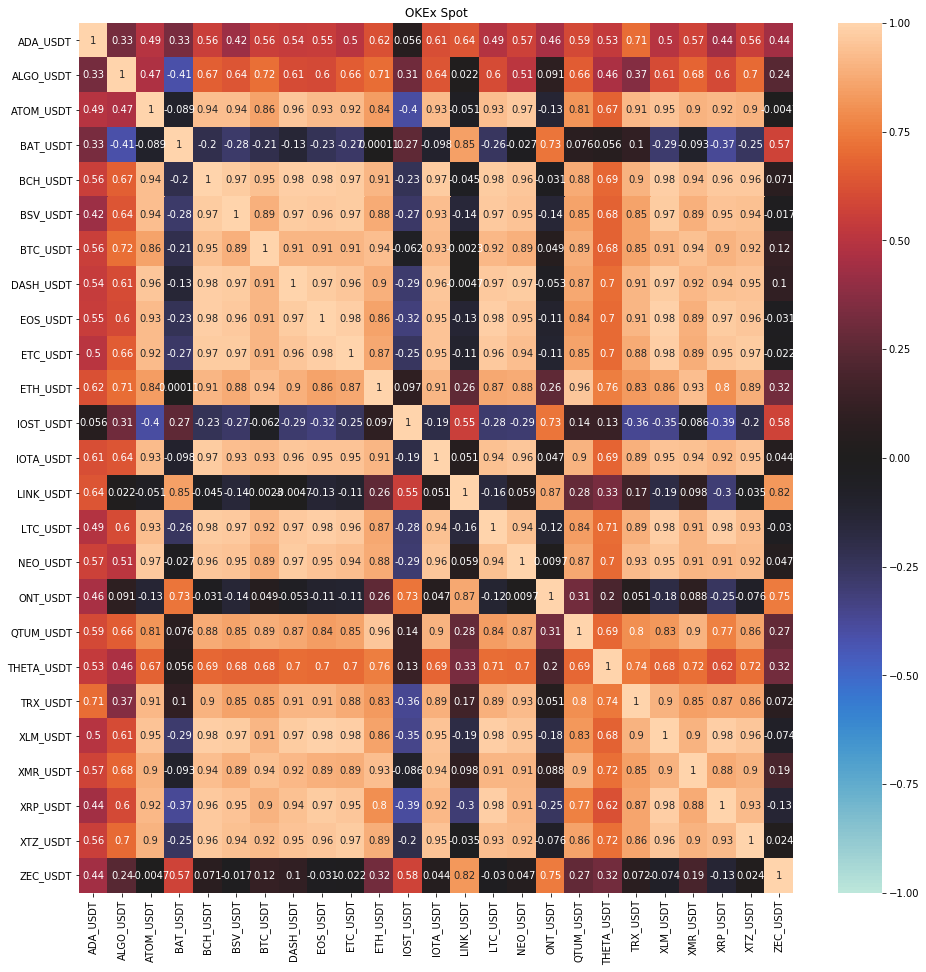

In [9]:
plot_corrs_in_exchange('OKEx', 'Spot')

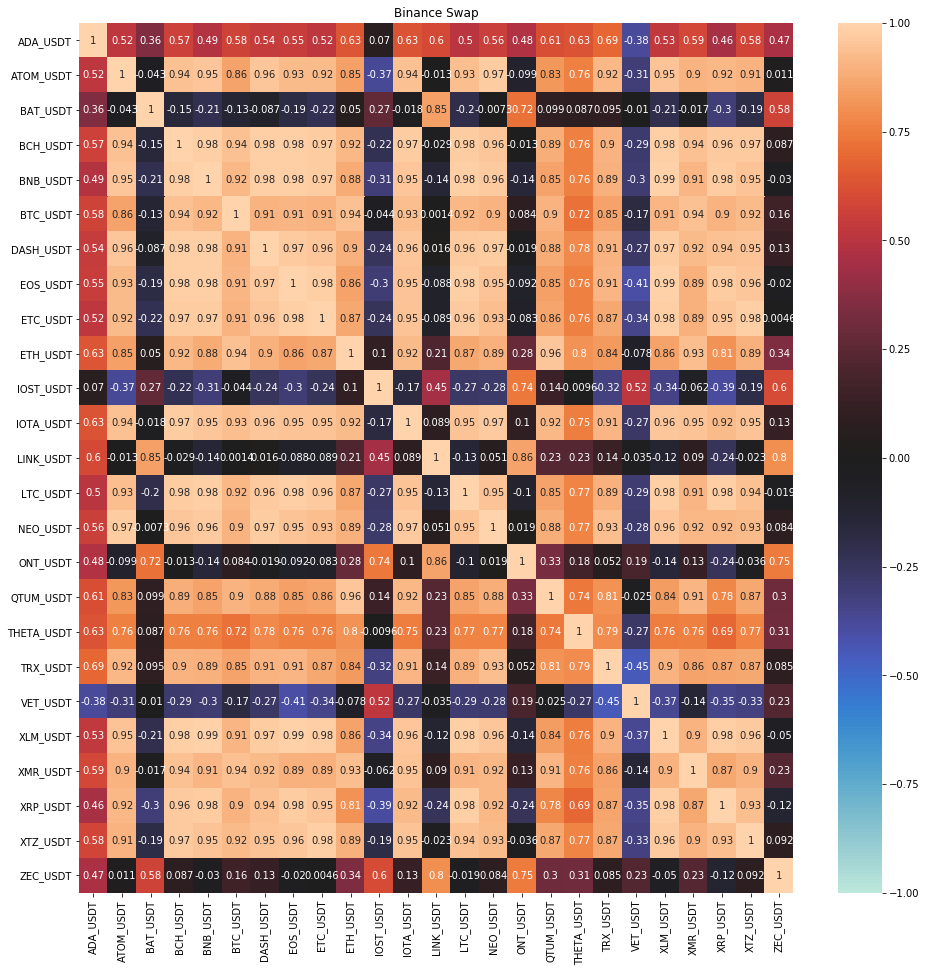

In [10]:
plot_corrs_in_exchange('Binance', 'Swap')

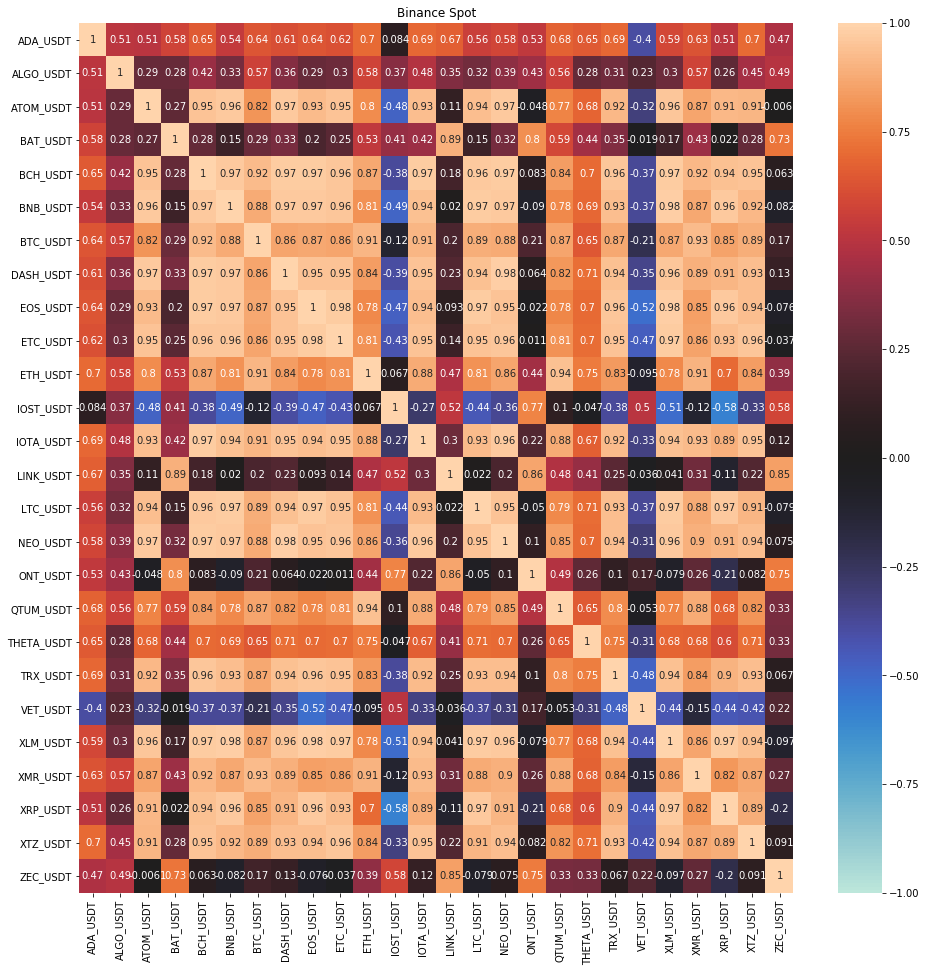

In [11]:
plot_corrs_in_exchange('Binance', 'Spot')

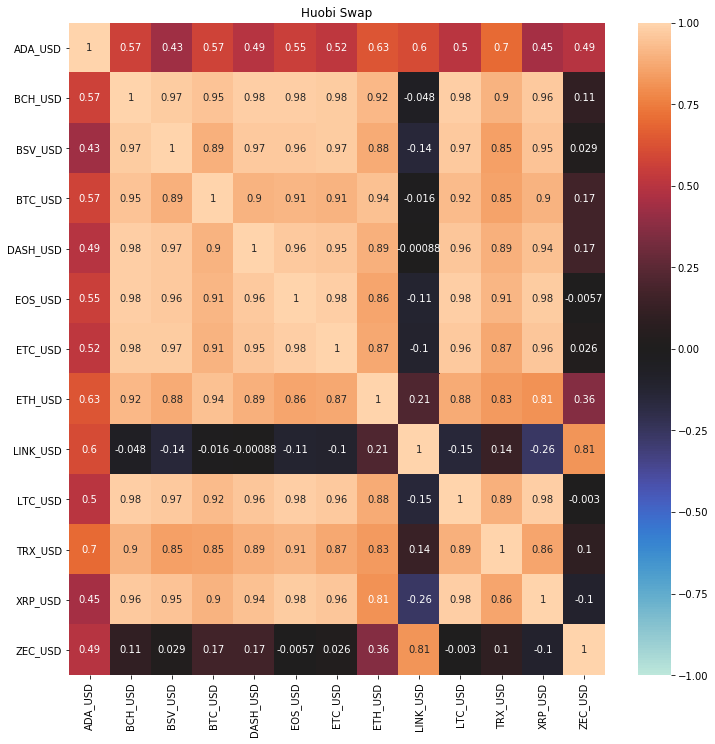

In [12]:
plot_corrs_in_exchange('Huobi', 'Swap', 12)

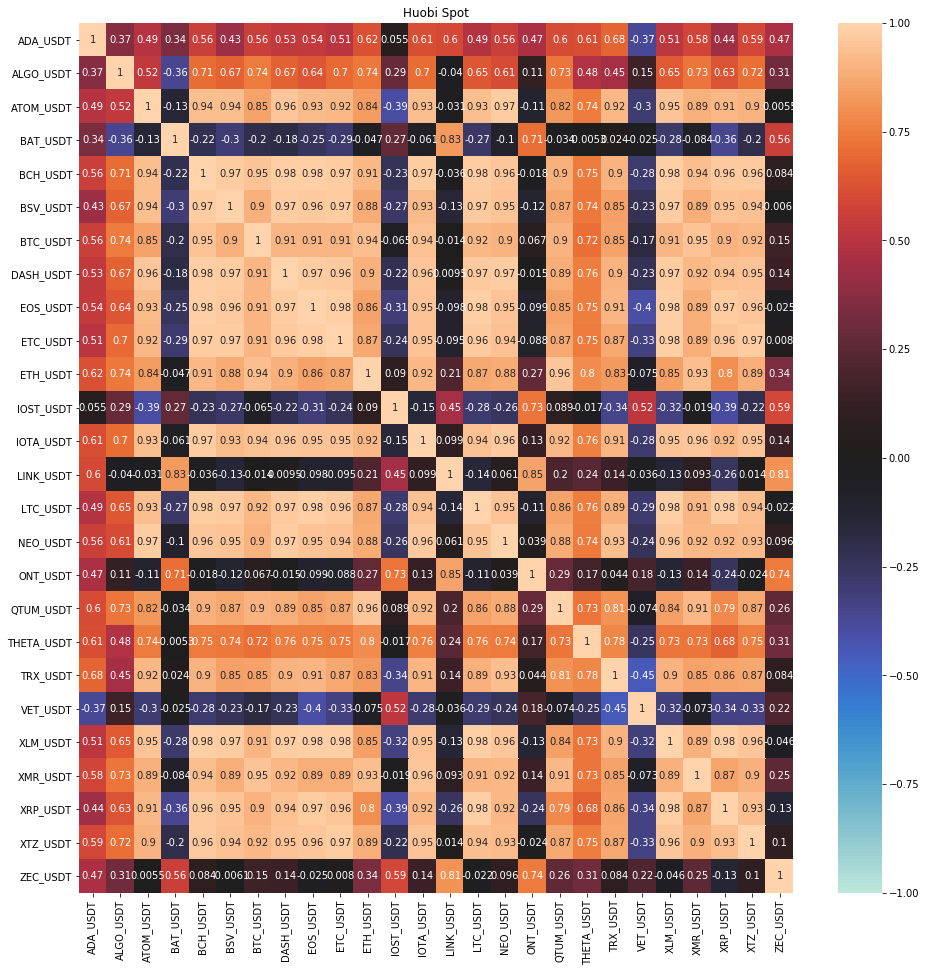

In [13]:
plot_corrs_in_exchange('Huobi', 'Spot')

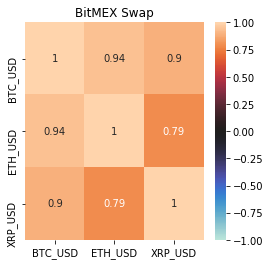

In [14]:
plot_corrs_in_exchange('BitMEX', 'Swap', 4)

## Plot correlations between different exchanges for the same pair

In [15]:
def plot_corrs_cross_exchanges(base: str, width: int=8)->None:
    df = prices_df.filter(regex=f'{base}_USD')

    fig, ax = plt.subplots(figsize=(width, width))
    sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center=0, ax=ax).set_title(base)

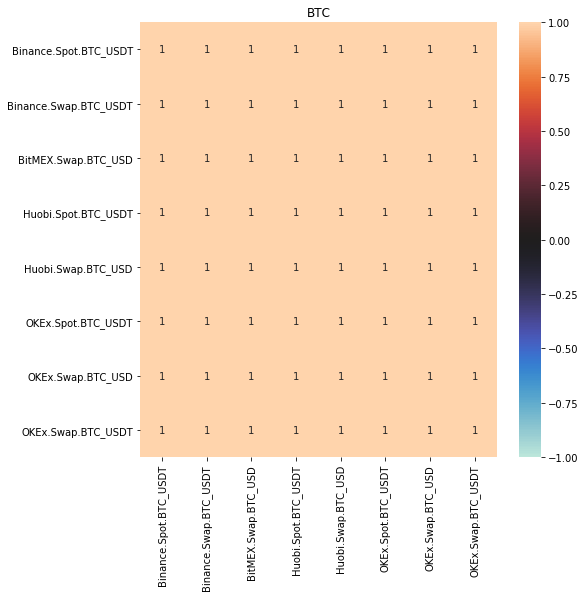

In [16]:
plot_corrs_cross_exchanges('BTC')

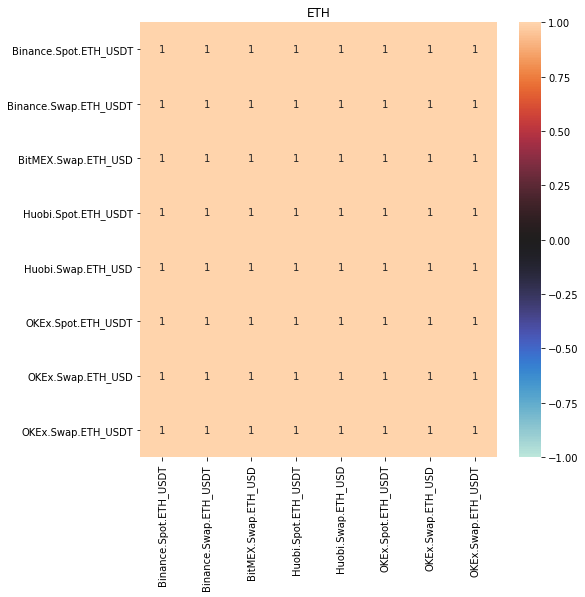

In [17]:
plot_corrs_cross_exchanges('ETH')

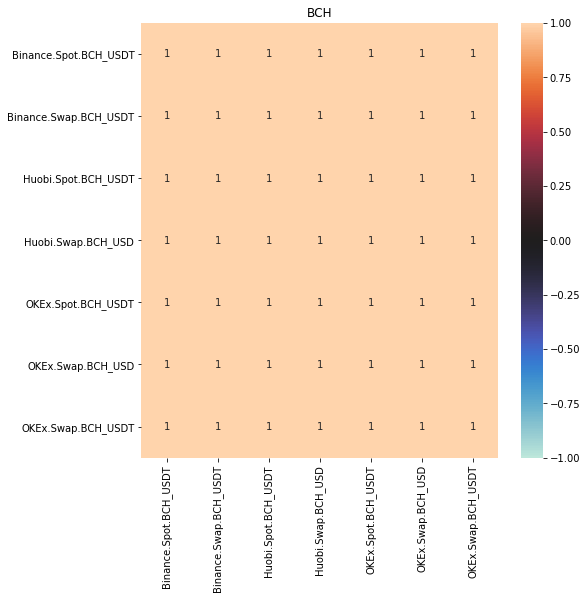

In [18]:
plot_corrs_cross_exchanges('BCH')

We can see that same trading pairs are highly synchronized between different exchanges.

## Sorting by correlations with BTC

In [19]:
prices_df.corr()['BitMEX.Swap.BTC_USD'].sort_values(ascending=False)[0:20]

BitMEX.Swap.BTC_USD      1.000000
OKEx.Swap.BTC_USD        0.999877
Huobi.Swap.BTC_USD       0.999839
OKEx.Spot.BTC_USDT       0.999668
Huobi.Spot.BTC_USDT      0.999664
OKEx.Swap.BTC_USDT       0.999651
Binance.Spot.BTC_USDT    0.999563
Binance.Swap.BTC_USDT    0.999541
OKEx.Swap.XMR_USD        0.964010
Huobi.Spot.XMR_USDT      0.945382
OKEx.Swap.BCH_USD        0.944514
Huobi.Swap.BCH_USD       0.944321
OKEx.Swap.BCH_USDT       0.943166
Huobi.Spot.BCH_USDT      0.942984
OKEx.Spot.BCH_USDT       0.942475
Binance.Swap.BCH_USDT    0.942235
OKEx.Spot.XMR_USDT       0.940277
Huobi.Spot.IOTA_USDT     0.940172
Binance.Swap.XMR_USDT    0.939068
BitMEX.Swap.ETH_USD      0.938258
Name: BitMEX.Swap.BTC_USD, dtype: float64

## References

* [Seaborn Heatmaps: 13 Ways to Customize Correlation Matrix Visualizations | by Okoh Anita](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07)
* [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)